<a href="https://colab.research.google.com/github/MukunthanPeriyasamy/Deep_Learning_Projects/blob/main/Multiclass_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mimg

In [84]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2024-12-08 11:32:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.207, 74.125.142.207, 74.125.199.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   162MB/s    in 3.1s    

2024-12-08 11:32:23 (162 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [3]:
# Extracting the zipFile
import zipfile
files = zipfile.ZipFile('10_food_classes_all_data.zip')
files.extractall()

# Custom Functions for visualizing the Image and Loss Accuracy of the model 👷‍♂️👷

In [5]:
import os
import random
def view_random_image():
  lis = os.listdir('10_food_classes_all_data/train')

  random_num = random.randint(0,9)

  image_path = '10_food_classes_all_data/train/' + lis[random_num]

  random_image_choice = os.listdir(image_path)

  random_image = random.choice(random_image_choice)

  random_image_path = '10_food_classes_all_data/train/' + lis[random_num] + '/' + random_image

  img = mimg.imread(random_image_path)
  print(img.shape)
  plt.imshow(img)
  plt.axis('off')
  plt.title(lis[random_num])

(382, 512, 3)


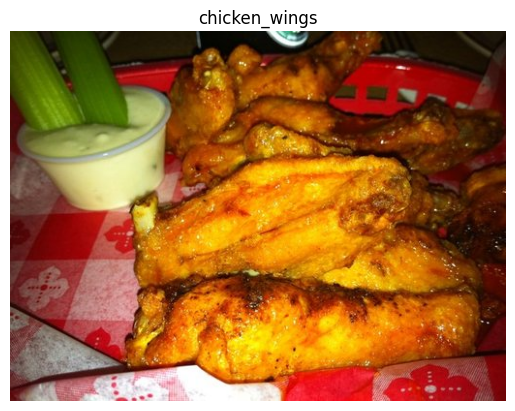

In [6]:
view_random_image()

# Image Data Processing 🧹🧹

In [7]:
def view_loss_curve(history_1):

  loss = history_1.history['loss']
  accuracy = history_1.history['accuracy']

  val_loss = history_1.history['val_loss']
  val_accuracy = history_1.history['val_accuracy']

  plt.plot(range(len(loss)),loss,label='loss')
  plt.plot(range(len(loss)),val_loss,label='val_loss')
  plt.title('Loss')
  plt.legend(loc='upper right')

  plt.figure()
  plt.plot(range(len(accuracy)),accuracy,label='accuracy')
  plt.plot(range(len(accuracy)),val_accuracy,label='val_accuracy')
  plt.title('Accuracy')
  plt.legend(loc = 'lower right')

In [8]:
train_dir = '10_food_classes_all_data/train'
test_dir = '10_food_classes_all_data/test'

In [9]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

#ImageDataGenerator for Train class

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

#ImageDataGenerator for Test class

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# Model Building 🛠🛠

In [9]:
model_1 = Sequential([
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Flatten(),

    Dense(10,activation = 'softmax')
])

model_1.compile(
    loss='categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history_1 = model_1.fit(
    train_data,
    validation_data = test_data,
    epochs=5
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 39s 134ms/step - accuracy: 0.1429 - loss: 2.2543 - val_accuracy: 0.2808 - val_loss: 2.0392
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 112ms/step - accuracy: 0.3018 - loss: 1.9720 - val_accuracy: 0.3176 - val_loss: 1.9404
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 133ms/step - accuracy: 0.4295 - loss: 1.7024 - val_accuracy: 0.3228 - val_loss: 1.9630
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 36s 113ms/step - accuracy: 0.6255 - loss: 1.1440 - val_accuracy: 0.3244 - val_loss: 2.1782
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 113ms/step - accuracy: 0.8300 - loss: 0.5690 - val_accuracy: 0.2892 - val_loss: 2.9200


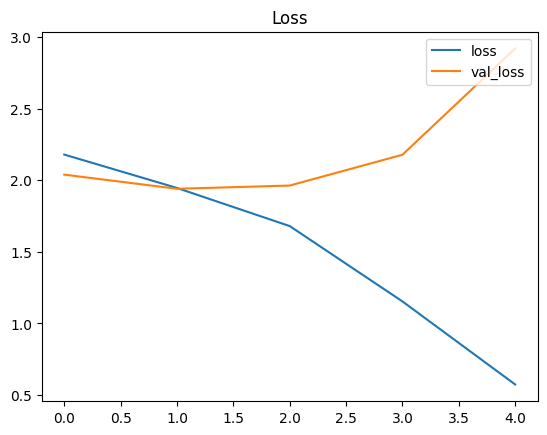

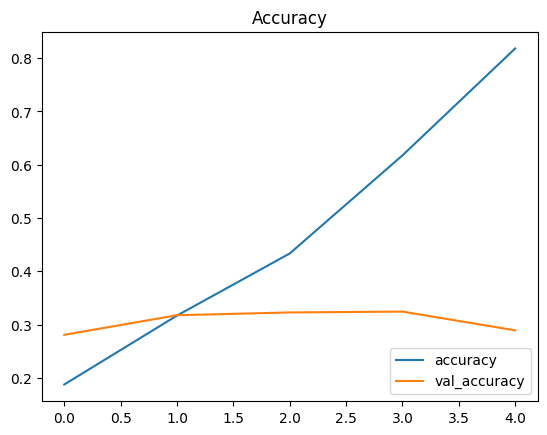

In [10]:
view_loss_curve(history_1)

In [11]:
model_1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.2769 - loss: 2.9155


[2.91995906829834, 0.2892000079154968]

In [12]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │         280,910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 851,762 (3.25 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 567,842 (2.17 MB)

In [10]:
model_2 = Sequential([

    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Flatten(),

    Dense(10,activation = 'softmax')
])

model_2.compile(
    loss='categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history_2 = model_2.fit(
    train_data,
    validation_data = test_data,
    epochs=5
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 34s 125ms/step - accuracy: 0.1906 - loss: 2.1919 - val_accuracy: 0.3152 - val_loss: 1.9414
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 34s 108ms/step - accuracy: 0.3383 - loss: 1.8988 - val_accuracy: 0.3692 - val_loss: 1.8474
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 126ms/step - accuracy: 0.4076 - loss: 1.7337 - val_accuracy: 0.3608 - val_loss: 1.8791
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 128ms/step - accuracy: 0.4649 - loss: 1.5792 - val_accuracy: 0.4040 - val_loss: 1.7387
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 131ms/step - accuracy: 0.5460 - loss: 1.3761 - val_accuracy: 0.3832 - val_loss: 1.8448


#Model Prediction 💻💻

In [85]:
import numpy as np
def prediction(image):

  img = image / 255

  resize_image = tf.image.resize(img,(224,224))

  final_image = tf.expand_dims(resize_image,axis=0)

  pred = model_2.predict(final_image)

  pred = pred.tolist()

  lis = os.listdir('10_food_classes_all_data/train')

  lis = sorted(lis)

  new_list = pred[0]

  print(max(new_list))

  max_val = new_list.index(max(new_list))

  output = lis[max_val]

  print(output)
  plt.imshow(image)
  plt.axis('off')
  plt.title(output)


In [86]:
image = '/content/10_food_classes_all_data/test/fried_rice/1023430.jpg'
image = mimg.imread(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
0.49022477865219116
fried_rice


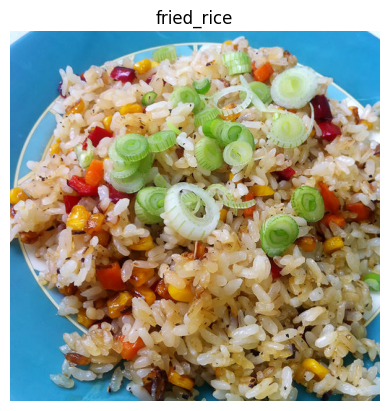

In [87]:
prediction(image)